In [1]:
import xarray as xr
#import cdsapi
import os
import matplotlib.pyplot as plt
import numpy as np
import iris
import xesmf as xe 

DATA_DIRECTORY = '/scratch/groups/earlew/yuchen/'

# Code to test rotation script

In [2]:
v_ds = xr.open_dataset(f'{DATA_DIRECTORY}/ERA5/10m_v_component_of_wind.nc')
u_ds = xr.open_dataset(f'{DATA_DIRECTORY}/ERA5/10m_u_component_of_wind.nc')
v_sps_ds = xr.open_dataset(f'{DATA_DIRECTORY}/ERA5/10m_v_component_of_wind_SPS.nc')
u_sps_ds = xr.open_dataset(f'{DATA_DIRECTORY}/ERA5/10m_u_component_of_wind_SPS.nc')

In [19]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

u_test, v_test = u_ds.u10.isel(expver=0, time=0), v_ds.v10.isel(expver=0, time=0)
u_test, v_test = u_test.sel(latitude=slice(-45,-90)), v_test.sel(latitude=slice(-45,-90))

In [21]:
u_test

<xarray.DataArray 'u10' (latitude: 181, longitude: 1440)>
[260640 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 -45.0 -45.25 -45.5 ... -89.5 -89.75 -90.0
    expver     int32 1
    time       datetime64[ns] 1978-01-01
Attributes:
    units:      m s**-1
    long_name:  10 metre U wind component

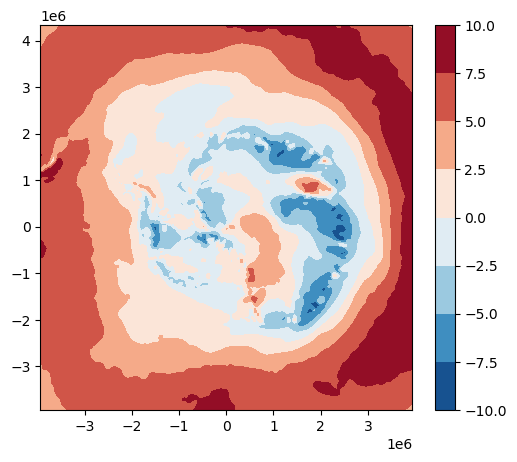

In [12]:

u_sps_plot = u_sps_ds.u10.isel(expver=0, time=0)
plt.figure(figsize=(6,5))
plt.contourf(u_sps_plot.xgrid, u_sps_plot.ygrid, u_sps_plot, cmap='RdBu_r')
plt.colorbar()

In [16]:
u_sps_plot

<xarray.DataArray 'u10' (ygrid: 332, xgrid: 316)>
array([[3.475537, 3.58139 , 3.683682, ..., 4.842257, 4.788318, 4.672306],
       [3.576247, 3.692148, 3.79498 , ..., 4.918859, 4.85872 , 4.756909],
       [3.689182, 3.804962, 3.908988, ..., 4.99545 , 4.936397, 4.832597],
       ...,
       [3.799468, 3.834378, 3.874326, ..., 4.81201 , 4.708443, 4.601458],
       [3.795285, 3.829555, 3.866479, ..., 4.678423, 4.569286, 4.466766],
       [3.792179, 3.811429, 3.84283 , ..., 4.51541 , 4.416598, 4.333202]],
      dtype=float32)
Coordinates:
    expver   int32 1
    time     datetime64[ns] 1978-01-01
  * ygrid    (ygrid) float32 4.338e+06 4.312e+06 ... -3.912e+06 -3.938e+06
  * xgrid    (xgrid) float32 -3.938e+06 -3.912e+06 ... 3.912e+06 3.938e+06

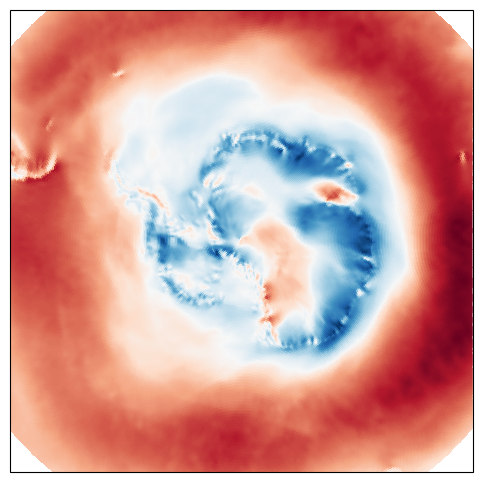

In [15]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': ccrs.SouthPolarStereo()})
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax.pcolormesh(u_test.longitude, u_test.latitude, u_test, transform=ccrs.PlateCarree(), cmap='RdBu_r')

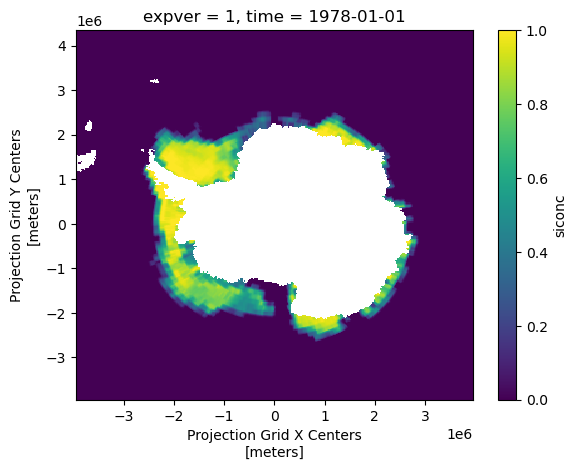

In [41]:
xr.open_dataset(f'{DATA_DIRECTORY}/ERA5/sea_ice_cover_SPS.nc').siconc.isel(time=0, expver=0).plot()
